first get the dataset sent


In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 1.3 MB/s eta 0:00:10
      --------------------------------------- 0.2/12.8 MB 1.6 MB/s eta 0:00:08
     - -------------------------------------- 0.4/12.8 MB 1.9 MB/s eta 0:00:07
     - -------------------------------------- 0.6/12.8 MB 2.6 MB/s eta 0:00:05
     -- ------------------------------------- 0.8/12.8 MB 3.0 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/12.8 MB 3.3 MB/s eta 0:00:04
     --- ------------------------------------ 1.2/12.8 MB 3.2 MB/s eta 0:00:04
     ---- ----------------------------------- 1.5/12.8 MB 3.6 MB/s eta 0:00:04
     ----- ---------------------------------- 1.7/12.8 MB 3.9 MB/s eta 0:00:03
     ------ --------------------------------- 2.0/12.8 MB 4.1 MB/s eta 0:00:03
     ------- -------------------------------- 2.4/12.8 MB 4.4 MB/s

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [5]:
df = pd.read_csv(r'C:\Users\jason\Documents\VS Code Programs\twitter-sentiment-analysis\content\twitter_sentiment.csv', header=None, index_col=[0])
df = df[[2,3]].reset_index(drop=True)
df.columns = ['sentiment', 'text']

In [6]:
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
df.info()

df.isnull().sum()

df.dropna(inplace=True)

df = df[df['text'].apply(len)>1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [8]:
df['sentiment'].value_counts()

sentiment
Negative      22530
Positive      20844
Neutral       18285
Irrelevant    12988
Name: count, dtype: int64

In [9]:
dt = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv', header=None, index_col=[0])


In [10]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\jason\temp\pip-req-build-b1f8vjqo
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for preprocess_kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7665 sha256=98c98083088de6adf95471f024e900c2c973f5a4886d1253fcfbcbe9cd84222a
  Stored in directory: C:\Users\jason\TEMP\pip-ephem-wheel-cache-hfn62hjp\wheels\24\f6\5f\6a2a2252acab6c8ce06a71a210d40e9b744871a9132dbf59bc
Successfully built

  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\jason\TEMP\pip-req-build-b1f8vjqo'


In [15]:
import preprocess_kgptalkie as ps

df = ps.get_basic_features(df)

In [16]:
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [17]:
df.head

<bound method NDFrame.head of         sentiment                                               text  \
0        Positive  im getting on borderlands and i will murder yo...   
1        Positive  I am coming to the borders and I will kill you...   
2        Positive  im getting on borderlands and i will kill you ...   
3        Positive  im coming on borderlands and i will murder you...   
4        Positive  im getting on borderlands 2 and i will murder ...   
...           ...                                                ...   
75677  Irrelevant  ⭐️ Toronto is the arts and culture capital of ...   
75678  Irrelevant  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...   
75679    Positive  Today sucked so it’s time to drink wine n play...   
75680    Positive  Bought a fraction of Microsoft today. Small wins.   
75681     Neutral  Johnson & Johnson to stop selling talc baby po...   

       char_counts  word_counts  avg_wordlength  stopwords_counts  \
0               43           11     

In [18]:
df.head()

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0
3,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
4,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0


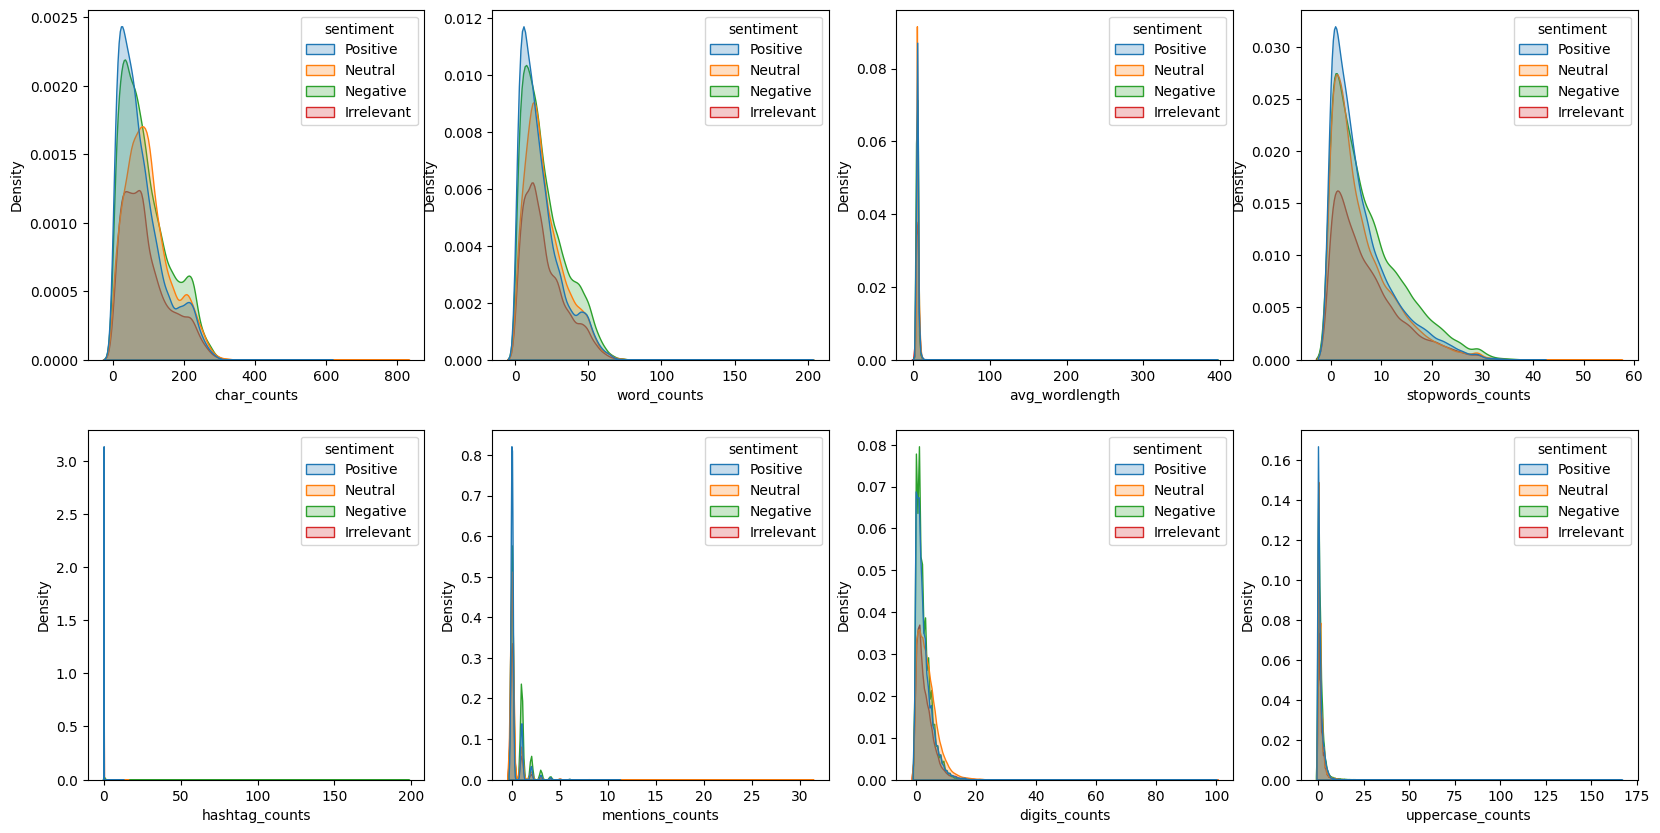

In [21]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plot 2x4 grid histogram for each numerical feature
plt.figure(figsize=(20,10))

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.subplot(2,4, num_cols.get_loc(col)+1)

    # use sentiment as hue to see the distribution of each numerical feature
    # sns.distplot(df[col], label=col, color='red')
    # sns.histplot(x=col, hue='sentiment', data=df, color='green', bins=100, kde=True)
    sns.kdeplot(data=df, x=col, hue='sentiment', fill=True)

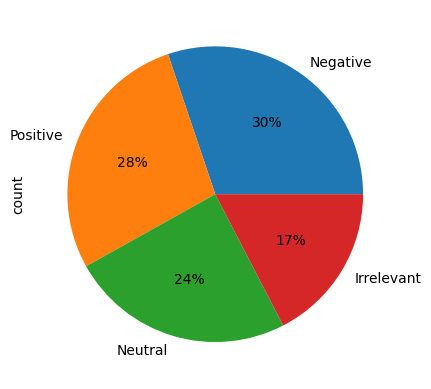

In [23]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# word cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

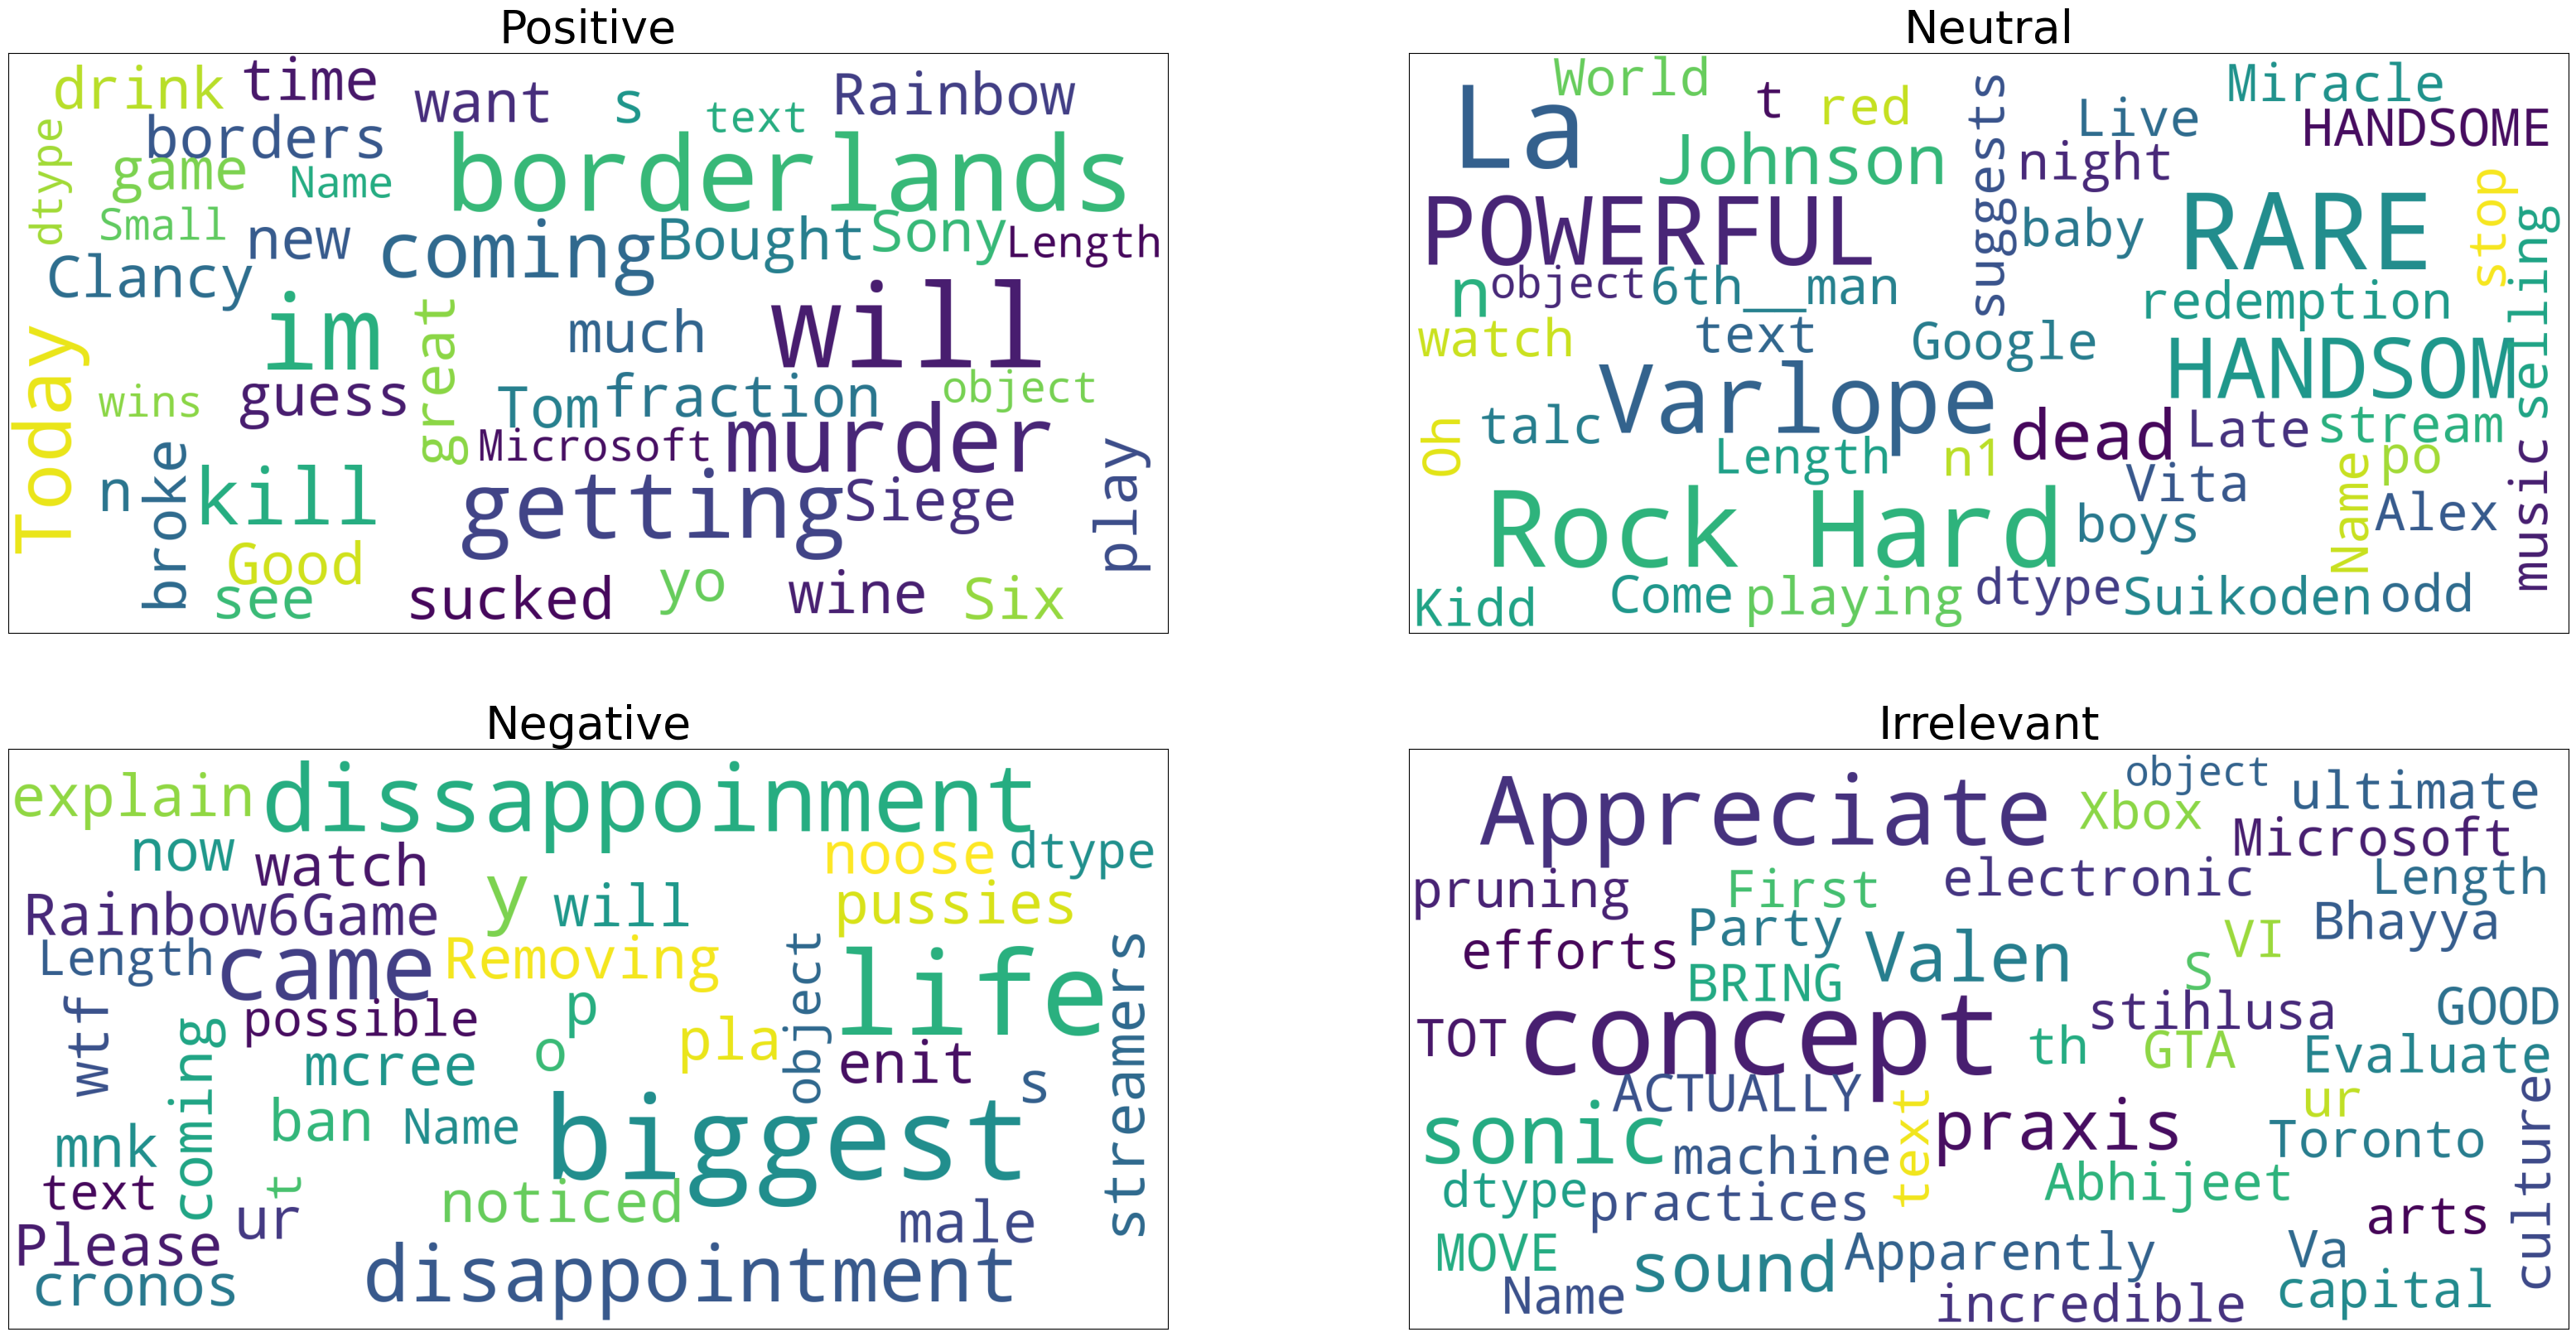

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)

plt.show()
plt.tight_layout()

In [30]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))

TypeError: remove_html_tags() got an unexpected keyword argument 'parser'

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((59717,), (14930,))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clf = Pipeline([('tfidf', TfidfVectorizer(stop_words=list(stopwords))), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])
clf.fit(X_train, y_train)

# evaluation
from sklearn.metrics import accuracy_score

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))


0.9121902210314803


In [ ]:
import pickle

pickle.dump(clf, open('twitter_sentiment.pkl', 'wb'))

In [ ]:

prediction = clf.predict(['what a wonderfull guy'])
print(prediction)

['Positive']


In [ ]:

prediction = clf.predict(['one of the worst people i have met'])
print(prediction)

['Negative']


In [ ]:
text_vec = vectorizer.transform(['how the hell are we in april already'])
prediction = clf.predict(text_vec)
print(prediction)

['Irrelevant']


In [ ]:
!pip install streamlit



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import time

st.title('Twitter Sentiment Analysis')

# Load your trained classifier model from a pickle file safely using a context manager
with open('twitter_sentiment.pkl', 'rb') as file:
    model = pickle.load(file)

tweet = st.text_input('Enter your tweet')

submit = st.button('Predict')

if submit:
    start = time.time()
    prediction = model.predict([tweet])
    end = time.time()
    st.write('Prediction time taken: ', round(end-start, 2), 'seconds')
    st.write('Predicted sentiment: ', prediction[0])



Writing app.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.81.46.56


In [ ]:
!pip install streamlit

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.81.46.56:8501

npx: installed 22 in 2.955s
your url is: https://five-pens-taste.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(
  Stopping...
^C
